In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("mbti.csv")

In [8]:
data

,이름,관계,유형,연락빈도
0,백동주,지인,ENFJ,0
1,강미나,지인,ENFJ,4
2,이윤형,가족,ESFJ,5
3,김수현,가족,INFJ,3
4,김현정,친구,INFJ,5
5,최하정,친구,ISFP,4
6,허민지,친구,ENTJ,2
7,윤가람,친구,ENTP,2
8,윤송은,친구,ENTJ,2
9,엄마,가족,ISFJ,5


In [10]:
data.drop('이름', axis=1, inplace=True)

In [11]:
data

,관계,유형,연락빈도
0,지인,ENFJ,0
1,지인,ENFJ,4
2,가족,ESFJ,5
3,가족,INFJ,3
4,친구,INFJ,5
5,친구,ISFP,4
6,친구,ENTJ,2
7,친구,ENTP,2
8,친구,ENTJ,2
9,가족,ISFJ,5


In [48]:
copied = data.copy()

In [49]:
copied.rename(columns = {'유형':'type', '연락빈도':'intimacy', '관계':'relation'}, inplace=True)

In [51]:
def changeToEng(x):
    if x == '지인':
        return 'acquaintance'
    elif x == '가족':
        return 'family'
    elif x == '동료':
        return 'colleague'
    else:
        return 'friend'

In [53]:
copied['relation'] = copied['relation'].apply(lambda x: changeToEng(x))

In [55]:
copied = pd.get_dummies(copied, columns=['relation'], drop_first=True)

In [56]:
copied

,type,intimacy,relation_colleague,relation_family,relation_friend
0,ENFJ,0,0,0,0
1,ENFJ,4,0,0,0
2,ESFJ,5,0,1,0
3,INFJ,3,0,1,0
4,INFJ,5,0,0,1
5,ISFP,4,0,0,1
6,ENTJ,2,0,0,1
7,ENTP,2,0,0,1
8,ENTJ,2,0,0,1
9,ISFJ,5,0,1,0


In [64]:
copied['type'].nunique()

15

In [105]:
for i in range(0,4):
    copied[i] = copied['type'].apply(lambda x: x[i])

In [106]:
copied

,type,intimacy,relation_colleague,relation_family,relation_friend,0,1,2,3
0,ENFJ,0,0,0,0,E,N,F,J
1,ENFJ,4,0,0,0,E,N,F,J
2,ESFJ,5,0,1,0,E,S,F,J
3,INFJ,3,0,1,0,I,N,F,J
4,INFJ,5,0,0,1,I,N,F,J
5,ISFP,4,0,0,1,I,S,F,P
6,ENTJ,2,0,0,1,E,N,T,J
7,ENTP,2,0,0,1,E,N,T,P
8,ENTJ,2,0,0,1,E,N,T,J
9,ISFJ,5,0,1,0,I,S,F,J


In [112]:
copied = pd.get_dummies(copied, columns=[0,1,2,3], drop_first=True)

In [107]:
from sklearn.cluster import KMeans

In [115]:
model = KMeans(n_clusters=4)

In [118]:
copied.drop('type', axis=1, inplace=True)

In [120]:
model.fit(copied)

KMeans(n_clusters=4)

In [123]:
model.labels_

array([1, 0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 3])

In [126]:
copied['label'] = model.labels_

In [134]:
copied.groupby('label').mean()

,intimacy,relation_colleague,relation_family,relation_friend,0_I,1_S,2_T,3_P
label,,,,,,,,
0,4.6,0.4,0.300000,0.200000,0.4,0.600000,0.300000,0.400000
1,0.0,0.0,0.333333,0.083333,0.5,0.333333,0.416667,0.583333
2,2.0,0.0,1.000000,0.000000,1.0,0.666667,0.000000,0.333333
3,1.8,0.0,0.000000,0.800000,0.2,0.000000,1.000000,0.600000


In [135]:
from sklearn.metrics import silhouette_score

In [140]:
sil = []

for i in range(2,7):
    model = KMeans(n_clusters=i)
    model.fit(copied)
    sil.append(silhouette_score(copied, model.labels_))

In [141]:
sil

[0.513252725801676,
 0.4680220818241971,
 0.44864179306819224,
 0.3416046763173998,
 0.27130425658894564]

<AxesSubplot:>

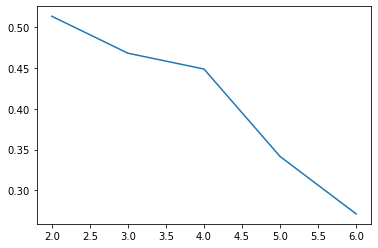

In [143]:
sns.lineplot(x=list(range(2,7)), y=sil)

the optimal number of cluster is 2

In [145]:
model = KMeans(n_clusters=2)
model.fit(copied)
copied['label'] = model.labels_

In [152]:
copied.groupby('label').mean()

,intimacy,relation_colleague,relation_family,relation_friend,0_I,1_S,2_T,3_P
label,,,,,,,,
0,0.75,0.0,0.35,0.25,0.5,0.3,0.5,0.55
1,4.60,0.4,0.30,0.20,0.4,0.6,0.3,0.40


<AxesSubplot:xlabel='intimacy', ylabel='0_I'>

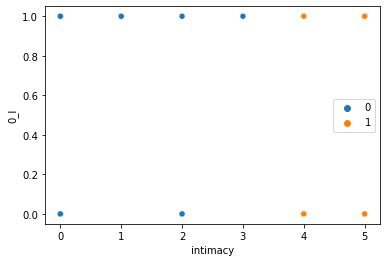

In [148]:
sns.scatterplot(x=copied['intimacy'], y=copied['0_I'], hue=model.labels_)